In [1]:
import pandas                             as      pd
import numpy                              as      np
import matplotlib.pyplot                  as      plt
import seaborn                            as      sns
from   IPython.display                    import  display
from   pylab                              import  rcParams 
from   datetime                           import  datetime, timedelta
from statsmodels.tsa.stattools            import  adfuller
from statsmodels.tsa.stattools            import  pacf
from statsmodels.tsa.stattools            import  acf
from statsmodels.graphics.tsaplots        import  plot_pacf
from statsmodels.graphics.tsaplots        import  plot_acf
from statsmodels.graphics.gofplots        import  qqplot
from statsmodels.tsa.seasonal             import  seasonal_decompose
from statsmodels.tsa.arima_model          import  ARIMA
from statsmodels.tsa.statespace.sarimax   import  SARIMAX
from statsmodels.tsa.api                  import  ExponentialSmoothing
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [9]:
train=pd.read_csv('train_(2).csv',parse_dates=True)
train.head(5)

,Month,Avg_sunspot_count
0,01-01-1749,97
1,02-01-1749,104
2,03-01-1749,117
3,04-01-1749,93
4,05-01-1749,142


In [10]:
train.tail(10)

,Month,Avg_sunspot_count
3134,03-01-2010,24
3135,04-01-2010,10
3136,05-01-2010,14
3137,06-01-2010,19
3138,07-01-2010,25
3139,08-01-2010,30
3140,09-01-2010,36
3141,10-01-2010,34
3142,11-01-2010,34
3143,12-01-2010,25


In [11]:
train.shape

(3144, 2)

In [12]:
train.dtypes

Month                object
Avg_sunspot_count     int64
dtype: object

In [13]:
train.isnull().sum()

Month                0
Avg_sunspot_count    0
dtype: int64

In [14]:
test = pd.read_csv('test_(2).csv')
test.shape

(120, 1)

In [15]:
date = pd.date_range(start='01-01-1749', end='12-01-2010', freq='MS')
date

DatetimeIndex(['1749-01-01', '1749-02-01', '1749-03-01', '1749-04-01',
               '1749-05-01', '1749-06-01', '1749-07-01', '1749-08-01',
               '1749-09-01', '1749-10-01',
               ...
               '2010-03-01', '2010-04-01', '2010-05-01', '2010-06-01',
               '2010-07-01', '2010-08-01', '2010-09-01', '2010-10-01',
               '2010-11-01', '2010-12-01'],
              dtype='datetime64[ns]', length=3144, freq='MS')

In [76]:
df['Date'] = pd.DataFrame(date)

In [77]:
df=df.set_index('Date')

In [78]:
df.head()

,Month,Avg_sunspot_count
Date,,
1749-01-01,01-01-1749,97
1749-02-01,02-01-1749,104
1749-03-01,03-01-1749,117
1749-04-01,04-01-1749,93
1749-05-01,05-01-1749,142


In [16]:
df = pd.read_csv('train_(2).csv', parse_dates = ['Month'], index_col = ['Month'])
df.head()

,Avg_sunspot_count
Month,
1749-01-01,97
1749-02-01,104
1749-03-01,117
1749-04-01,93
1749-05-01,142


In [17]:
df.tail()

,Avg_sunspot_count
Month,
2010-08-01,30
2010-09-01,36
2010-10-01,34
2010-11-01,34
2010-12-01,25


<AxesSubplot:xlabel='Month'>

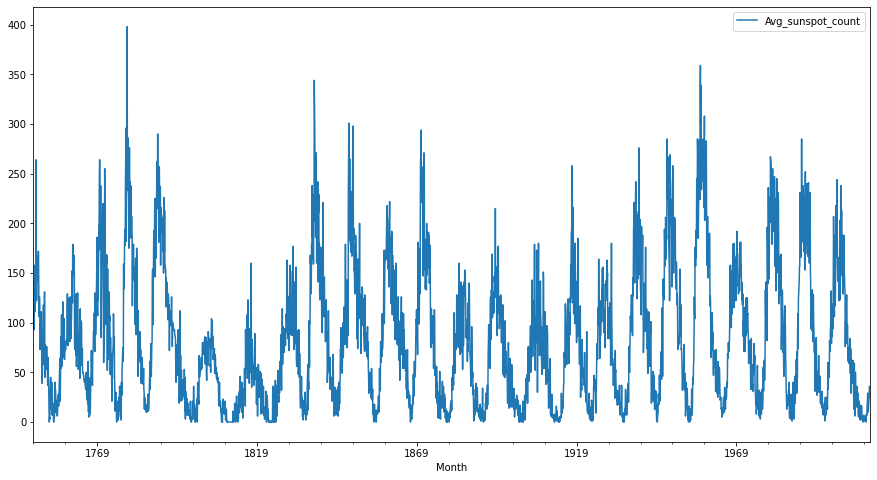

In [18]:
rcParams['figure.figsize'] = 15,8

df.plot()

In [19]:
df = df.loc['1910-01-01' : :]

In [20]:
df.tail()

,Avg_sunspot_count
Month,
2010-08-01,30
2010-09-01,36
2010-10-01,34
2010-11-01,34
2010-12-01,25


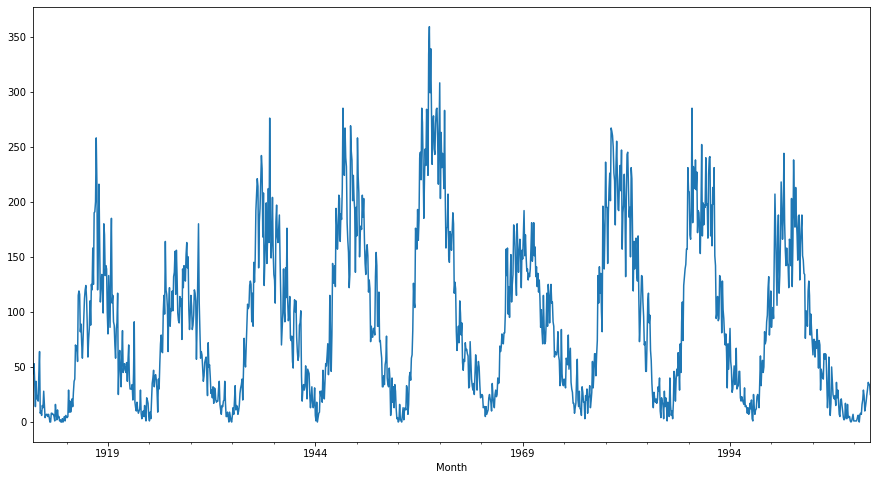

In [21]:
rcParams['figure.figsize'] = 15,8
df['Avg_sunspot_count'].plot()
plt.show()

# Exploratory Data Analysis

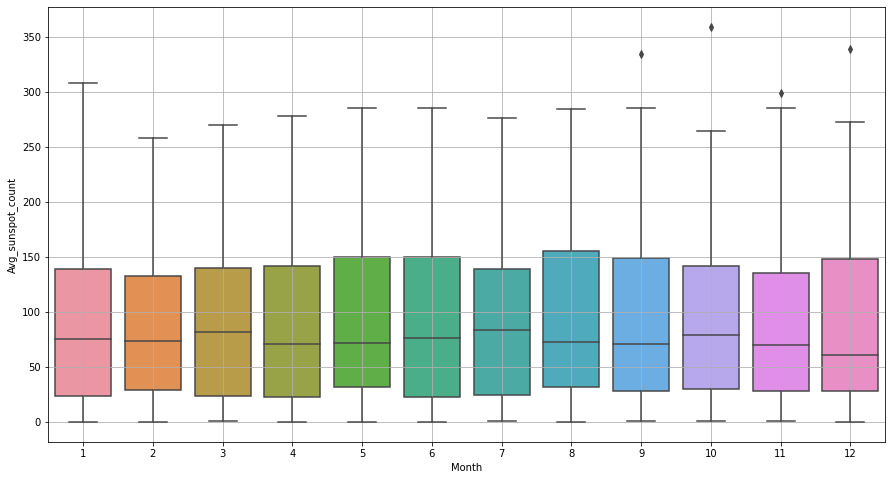

In [22]:
sns.boxplot(x = df.index.month,y = df['Avg_sunspot_count'])
plt.grid();

# Decomposing time series

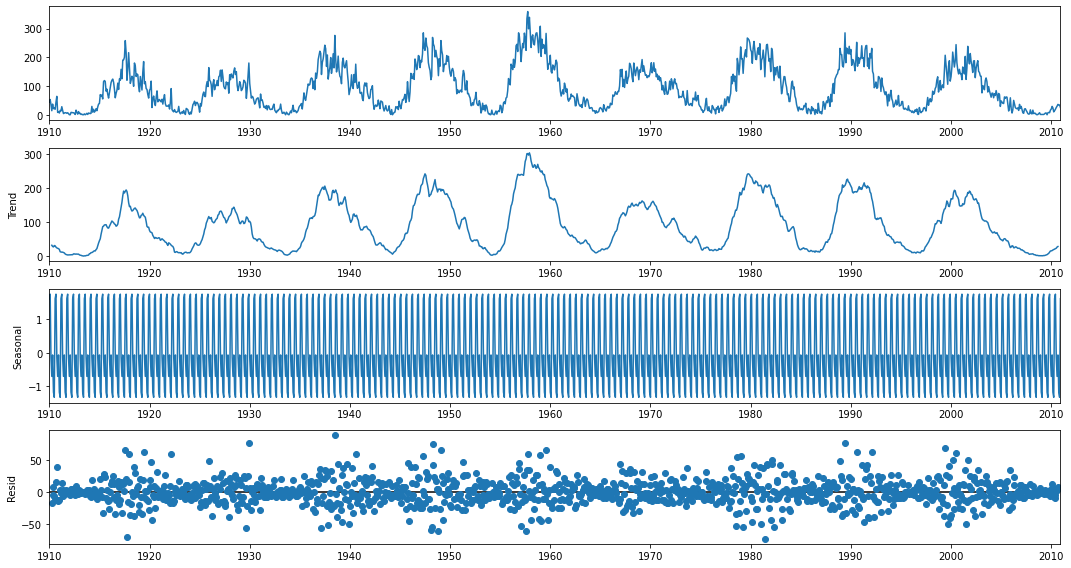

In [23]:
decomposition = seasonal_decompose(df, model = 'additive',period=7)
decomposition.plot()
plt.show()

# Looking for stationarity

plotting monthly mean

<AxesSubplot:xlabel='Month'>

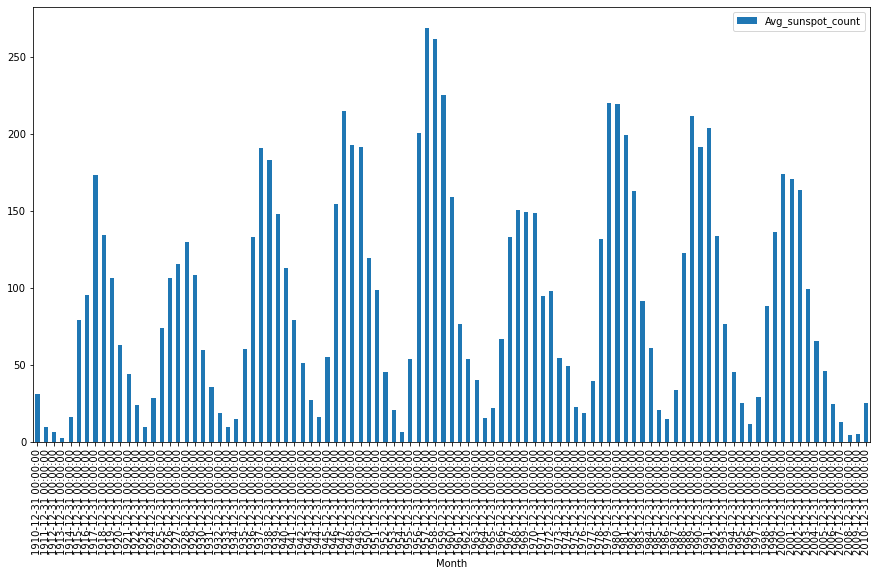

In [24]:
monthly_mean = df.resample('Y').mean()
monthly_mean.plot.bar()

# lets plot rolling mean and std deviation

In [26]:
rolmean = df.rolling(window=15).mean()
rolstd = df.rolling(window=15).std()

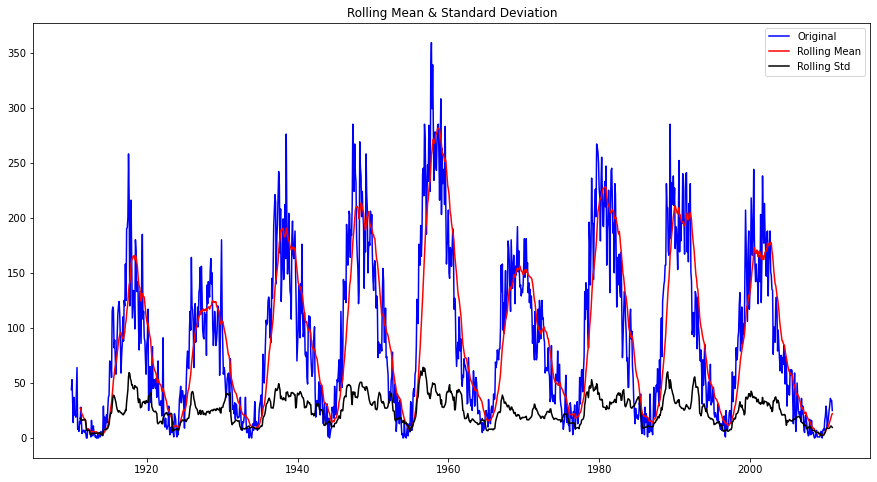

In [28]:
orig = plt.plot(df, color='blue',label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show()

# statistical test to confirm the stationarity


In [92]:
observations= df_train.values
test_result = adfuller(observations)

In [93]:
print('ADF Statistic: %f' % test_result[0])
print('p-value: %f' % test_result[1])
print('Critical Values:')
for key, value in test_result[4].items():
	print('\t%s: %.5f' % (key, value))

ADF Statistic: -6.948444
p-value: 0.000000
Critical Values:
	1%: -3.43587
	5%: -2.86398
	10%: -2.56807


# Test result confirms that series is non-stationary

# ACF and PACF plots for the series

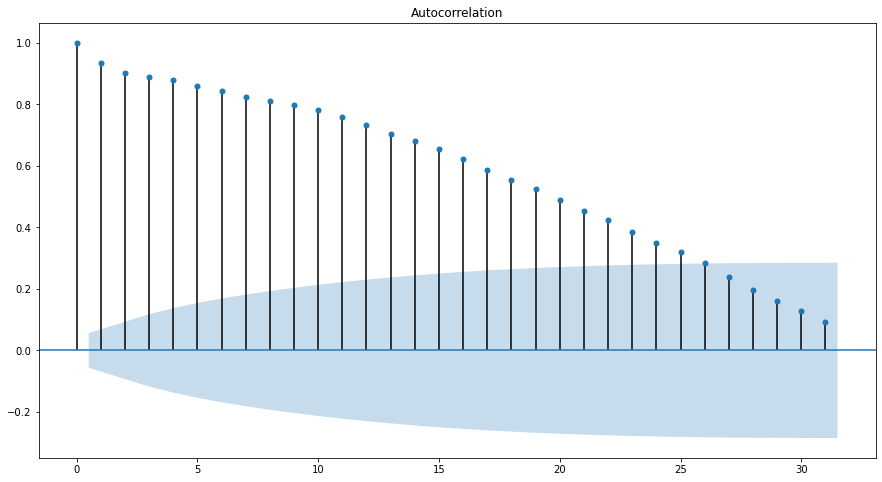

In [94]:
plot_acf(df_train);

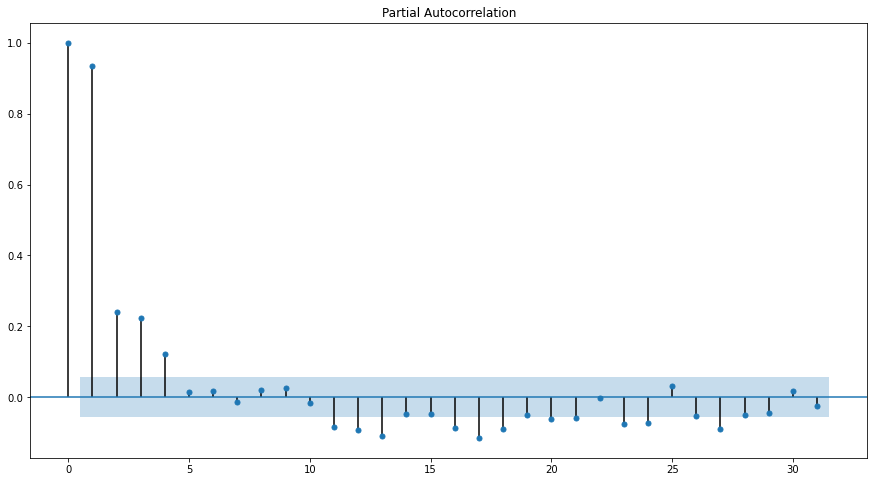

In [95]:
plot_pacf(df_train);

In [96]:
df_test = pd.read_csv('test_(2).csv',parse_dates=True)
df_test.head()

,Month
0,01-01-2011
1,02-01-2011
2,03-01-2011
3,04-01-2011
4,05-01-2011


In [97]:
df_test.tail()

,Month
115,08-01-2020
116,09-01-2020
117,10-01-2020
118,11-01-2020
119,12-01-2020


In [98]:
test_date = pd.date_range(start='01-01-2011', end='12-01-2020', freq='MS')
test_date

DatetimeIndex(['2011-01-01', '2011-02-01', '2011-03-01', '2011-04-01',
               '2011-05-01', '2011-06-01', '2011-07-01', '2011-08-01',
               '2011-09-01', '2011-10-01',
               ...
               '2020-03-01', '2020-04-01', '2020-05-01', '2020-06-01',
               '2020-07-01', '2020-08-01', '2020-09-01', '2020-10-01',
               '2020-11-01', '2020-12-01'],
              dtype='datetime64[ns]', length=120, freq='MS')

In [99]:
df_test['Date'] = pd.DataFrame(test_date)

In [100]:
df_test.head()

,Month,Date
0,01-01-2011,2011-01-01
1,02-01-2011,2011-02-01
2,03-01-2011,2011-03-01
3,04-01-2011,2011-04-01
4,05-01-2011,2011-05-01


In [101]:
df_test = df_test.set_index('Date')

In [102]:
df_test.head()

,Month
Date,
2011-01-01,01-01-2011
2011-02-01,02-01-2011
2011-03-01,03-01-2011
2011-04-01,04-01-2011
2011-05-01,05-01-2011


In [103]:
df_test=df_test.drop('Month',axis=1)

In [125]:
df_test.head()

""
Date
2011-01-01
2011-02-01
2011-03-01
2011-04-01
2011-05-01


# ARIMA

In [104]:
import itertools

p=q=range(0,3)
d=range(0,1)
pdq=list(itertools.product(p,d,q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [105]:
ARIMA_AIC = pd.DataFrame(columns=['param','AIC'])

In [56]:
import statsmodels.api as sm
for param in pdq:
    ARIMA_model=ARIMA(df_train[-1000:], order = param).fit()
    print('ARIMA{} - AIC:{}'.format(param, ARIMA_model.aic))
    ARIMA_AIC= ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)


ARIMA(0, 0, 0) - AIC:11505.948999773269
ARIMA(0, 0, 1) - AIC:10645.80575243307
ARIMA(0, 0, 2) - AIC:10220.685073485347
ARIMA(1, 0, 0) - AIC:9440.67821903466
ARIMA(1, 0, 1) - AIC:9341.130278475448
ARIMA(1, 0, 2) - AIC:9325.664425225983
ARIMA(2, 0, 0) - AIC:9382.325650507457
ARIMA(2, 0, 1) - AIC:9329.651121881292
ARIMA(2, 0, 2) - AIC:9327.184453770904


In [57]:
ARIMA_AIC.sort_values(by='AIC', ascending=True)

,param,AIC
5,"(1, 0, 2)",9325.664425
8,"(2, 0, 2)",9327.184454
7,"(2, 0, 1)",9329.651122
4,"(1, 0, 1)",9341.130278
6,"(2, 0, 0)",9382.325651
3,"(1, 0, 0)",9440.678219
2,"(0, 0, 2)",10220.685073
1,"(0, 0, 1)",10645.805752
0,"(0, 0, 0)",11505.949000


In [106]:
model= ARIMA(df_train[-1000:], order=(1,0,2))
ARIMA_result= model.fit()
ARIMA_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:      Avg_sunspot_count   No. Observations:                 1000
Model:                     ARMA(1, 2)   Log Likelihood               -4657.832
Method:                       css-mle   S.D. of innovations             25.476
Date:                Thu, 16 Sep 2021   AIC                           9325.664
Time:                        20:54:04   BIC                           9350.203
Sample:                    09-01-1927   HQIC                          9334.991
                         - 12-01-2010                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      94.6398     23.598      4.010      0.000      48.389     140.891
ar.L1.Avg_sunspot_count     0.9831      0.006    166.738      0.000       0.972       0.995
ma.L1.Avg_sunspot_count    -0.3514      0.032    -10.934      0.000      -0.414      -0.288
ma.L2.Avg_sunspot_count    -0.1274      0.030     -4.269      0.000      -0.186      -0.069
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0172           +0.0000j            1.0172            0.0000
MA.1            1.7437           +0.0000j            1.7437            0.0000
MA.2           -4.5027           +0.0000j            4.5027            0.5000
-----------------------------------------------------------------------------
"""

In [107]:
ARIMA_predictions=ARIMA_result.forecast(steps=len(df_test))

In [108]:
ARIMA_predictions

(array([29.67025542, 32.03534048, 33.09150946, 34.12986033, 35.15069369,
        36.15430507, 37.14098501, 38.11101917, 39.06468835, 40.00226864,
        40.92403148, 41.83024371, 42.72116768, 43.5970613 , 44.45817816,
        45.30476753, 46.13707451, 46.95534004, 47.75980102, 48.55069034,
        49.32823694, 50.09266594, 50.84419863, 51.58305259, 52.3094417 ,
        53.02357625, 53.72566299, 54.41590517, 55.09450262, 55.76165177,
        56.41754579, 57.06237453, 57.69632469, 58.31957978, 58.93232024,
        59.53472346, 60.12696383, 60.7092128 , 61.28163893, 61.84440795,
        62.39768276, 62.94162355, 63.47638778, 64.00213026, 64.5190032 ,
        65.02715623, 65.52673645, 66.01788851, 66.50075458, 66.97547445,
        67.44218556, 67.90102301, 68.35211964, 68.79560604, 69.2316106 ,
        69.66025954, 70.08167695, 70.49598484, 70.90330314, 71.30374978,
        71.69744067, 72.0844898 , 72.46500921, 72.83910907, 73.20689767,
        73.56848149, 73.92396521, 74.27345173, 74.6

In [ ]:
rmse = sqrt(mean_squared_error(df_test.Avg_sunspot_count,TES_predictions))
print(rmse)

# SARIMA

In [30]:
df.shape

(1212, 1)

In [32]:
train_S = df[:1200]
test_S = df[1200:]

In [33]:
train_S.shape

(1200, 1)

In [35]:
obv = df.values
test_results = adfuller(obv)

In [36]:
print(f'ADF Statistics : {test_results[0]}')
print(f'p-values : {test_results[1]}')
print('Critical Values :')
for i, j in test_results[4].items():
    print('\t', i, j)

ADF Statistics : -6.948443669008776
p-values : 9.833336358842024e-10
Critical Values :
	 1% -3.4358664022823593
	 5% -2.8639759363158124
	 10% -2.5680669397963927


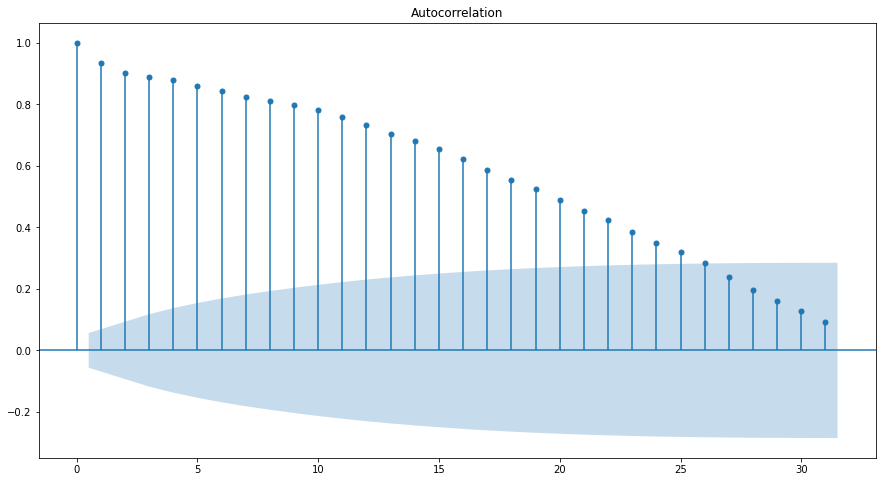

In [38]:
plot_acf(df);

In [39]:
import itertools
p = q = range(1, 4)
d = range(0,1)
pdq = list(itertools.product(p, d, q))

model_pdq = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, d, q))]
model_pdq

[(1, 0, 1, 6),
 (1, 0, 2, 6),
 (1, 0, 3, 6),
 (2, 0, 1, 6),
 (2, 0, 2, 6),
 (2, 0, 3, 6),
 (3, 0, 1, 6),
 (3, 0, 2, 6),
 (3, 0, 3, 6)]

In [40]:
frame = pd.DataFrame(columns=['param','seasonal', 'AIC'])
frame

,param,seasonal,AIC


In [41]:
import statsmodels.api as sm
for param in pdq:
    for param_seasonal in model_pdq:
        mod = sm.tsa.statespace.SARIMAX(train_S,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False, # For AR parameter
                                            enforce_invertibility=False) # For MA parameter
            
        results_SARIMA = mod.fit()
        print('SARIMA{}x{}6 - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        frame = frame.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(1, 0, 1)x(1, 0, 1, 6)6 - AIC:11116.943590982026
SARIMA(1, 0, 1)x(1, 0, 2, 6)6 - AIC:11062.47119887893
SARIMA(1, 0, 1)x(1, 0, 3, 6)6 - AIC:11013.274870157673
SARIMA(1, 0, 1)x(2, 0, 1, 6)6 - AIC:11071.089197674346
SARIMA(1, 0, 1)x(2, 0, 2, 6)6 - AIC:11064.320511295635
SARIMA(1, 0, 1)x(2, 0, 3, 6)6 - AIC:11015.005022881409
SARIMA(1, 0, 1)x(3, 0, 1, 6)6 - AIC:11021.945892009011
SARIMA(1, 0, 1)x(3, 0, 2, 6)6 - AIC:11023.549270195068
SARIMA(1, 0, 1)x(3, 0, 3, 6)6 - AIC:11016.440306944874
SARIMA(1, 0, 2)x(1, 0, 1, 6)6 - AIC:11086.187356086273
SARIMA(1, 0, 2)x(1, 0, 2, 6)6 - AIC:11029.222588089762
SARIMA(1, 0, 2)x(1, 0, 3, 6)6 - AIC:10980.772653072745
SARIMA(1, 0, 2)x(2, 0, 1, 6)6 - AIC:11046.330857062565
SARIMA(1, 0, 2)x(2, 0, 2, 6)6 - AIC:11031.01121325119
SARIMA(1, 0, 2)x(2, 0, 3, 6)6 - AIC:10982.58767798428
SARIMA(1, 0, 2)x(3, 0, 1, 6)6 - AIC:10997.750864506479
SARIMA(1, 0, 2)x(3, 0, 2, 6)6 - AIC:10999.228943074238
SARIMA(1, 0, 2)x(3, 0, 3, 6)6 - AIC:10985.192647065067
SARIMA(1, 0, 

In [42]:
frame.sort_values(by=['AIC'])

,param,seasonal,AIC
47,"(2, 0, 3)","(1, 0, 3, 6)",10948.087400
20,"(1, 0, 3)","(1, 0, 3, 6)",10973.384655
74,"(3, 0, 3)","(1, 0, 3, 6)",10973.549950
23,"(1, 0, 3)","(2, 0, 3, 6)",10975.237241
77,"(3, 0, 3)","(2, 0, 3, 6)",10975.548027
...,...,...,...
63,"(3, 0, 2)","(1, 0, 1, 6)",11085.557840
9,"(1, 0, 2)","(1, 0, 1, 6)",11086.187356
36,"(2, 0, 2)","(1, 0, 1, 6)",11087.334747
27,"(2, 0, 1)","(1, 0, 1, 6)",11100.922450


In [43]:
import statsmodels.api as sm

model = sm.tsa.statespace.SARIMAX(train_S,
                                order = (1, 0, 3),
                                seasonal_order = (3, 0, 3, 6),
                                enforce_stationarity = False,
                                enforce_invertibility = False)

model_Sarima = model.fit()
print(model_Sarima.summary())

                                     SARIMAX Results                                     
Dep. Variable:                 Avg_sunspot_count   No. Observations:                 1200
Model:             SARIMAX(1, 0, 3)x(3, 0, 3, 6)   Log Likelihood               -5477.725
Date:                           Fri, 17 Sep 2021   AIC                          10977.451
Time:                                   05:08:29   BIC                          11033.238
Sample:                               01-01-1910   HQIC                         10998.484
                                    - 12-01-2009                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9935      0.003    333.438      0.000       0.988       0.999
ma.L1         -0.3628      0.026    -14.205

In [65]:
p = q = range(0, 3)
d= range(0,2)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])

In [66]:
for param in pdq:
    for param_seasonal in model_pdq:
        mod = sm.tsa.statespace.SARIMAX(df_train[-1000:],
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = mod.fit()
        print('SARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SAMIRA_AIC = SAMIRA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
    

SARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:12462.71930418062
SARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:11448.316002993986
SARIMA(0, 0, 0)x(0, 0, 2, 12)12 - AIC:10849.472515229714
SARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:10722.242016023858
SARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:10543.208116858323
SARIMA(0, 0, 0)x(0, 1, 2, 12)12 - AIC:10386.71072532007
SARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:10677.831344310474
SARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:10593.998734335206
SARIMA(0, 0, 0)x(1, 0, 2, 12)12 - AIC:10420.308695346755
SARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:10544.688335237106
SARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:10532.29197933019
SARIMA(0, 0, 0)x(1, 1, 2, 12)12 - AIC:10289.72977435957
SARIMA(0, 0, 0)x(2, 0, 0, 12)12 - AIC:10452.751912196632
SARIMA(0, 0, 0)x(2, 0, 1, 12)12 - AIC:10446.360903097617
SARIMA(0, 0, 0)x(2, 0, 2, 12)12 - AIC:10403.313357050383
SARIMA(0, 0, 0)x(2, 1, 0, 12)12 - AIC:10415.62207499819
SARIMA(0, 0, 0)x(2, 1, 1, 12)12 - AIC:10200.85477506715
SARIMA(0, 0, 0)x(2, 1, 2, 12)12 - AIC

In [45]:
SARIMA_predictions=model_sarima.forecast(steps=len(df_test))

NameError: name 'model_sarima' is not defined

In [ ]:
SARIMA_predictions.plot()

In [ ]:
SARIMA_predictions

In [ ]:
rmse= np.sqrt(mean_squared_error(test, SARIMA_predictions[0]))
rmse

# Exponential Smoothing

In [119]:
model_TES = ExponentialSmoothing(df_train,seasonal='add',
                                 seasonal_periods=134)
model_TES = model_TES.fit(smoothing_level=0.1,smoothing_seasonal=0.1,optimized=True)

In [121]:
model_TES.summary()

Dep. Variable:,Avg_sunspot_count,No. Observations:,1212
Model:,ExponentialSmoothing,SSE,1428779.452
Optimized:,True,AIC,8843.632
Trend:,None,BIC,9537.236
Seasonal:,Additive,AICC,8879.386
Seasonal Periods:,134,Date:,"Thu, 16 Sep 2021"
Box-Cox:,False,Time:,20:56:15
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.1000000,alpha,False
smoothing_seasonal,0.1000000,gamma,False


In [130]:
df_test.head()

""
Date
2011-01-01
2011-02-01
2011-03-01
2011-04-01
2011-05-01


In [ ]:
df_test['Avg_sunspot_count'] = forecast.values

In [ ]:
df_test.to_csv('final_values.csv',index= False)

In [140]:
df_test1 = pd.read_csv('test_(2).csv')
df_test1['Avg_sunspot_count'] = forecast.values
df_test1.to_csv('final_values.csv',index= False)

In [112]:
df1=pd.DataFrame(forecast)
df1.index=df_test.index

In [115]:
df1.columns=['Avg_sunspot_count']
df1

,Avg_sunspot_count
Date,
2011-01-01,35.175341
2011-02-01,29.017081
2011-03-01,41.772620
2011-04-01,57.535076
2011-05-01,49.638364
...,...
2020-08-01,8.432620
2020-09-01,12.833106
2020-10-01,6.520363


In [122]:
df1.to_csv('file_final.csv')